# Coffee and Productivity

Does coffee consumption in a population correlate with higher productivity as measured in GDP per hour worked?

Background: On an individual level, consumption of coffee and its active ingredient, caffeine (a stimulant), is associated with higher levels of “energy” and “productivity”. But in a given population, such as a nation-state, does higher coffee consumption indicate a higher level of productivity? 


In [14]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem, ttest_ind

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
coffee_data_to_load = "data/project_data.csv"

# Read the Data
coffee_data = pd.read_csv(coffee_data_to_load)

coffee_data.head()

# plt.rcParams["figure.figsize"] = 16,9


,Country Name,Year,Coffee Consumed,MEASURE,gdp_per_hour_worked,gdp_for_year,gdp_per_capita,population,Unemployed (%)
0,Austria,1999,1123,USD,43.67,217185787343,28722,7561609,3.7
1,Austria,2000,875,USD,44.71,196799778883,25922,7592073,3.5
2,Austria,2001,1013,USD,45.28,197337879195,25848,7634560,3.6
3,Austria,2002,926,USD,46.14,213377771504,27772,7683162,4.0
4,Austria,2003,720,USD,46.51,261695778781,33889,7722033,4.3


In [15]:
agg_mean_coffee = coffee_data.groupby(["Year"]).aggregate({'Coffee Consumed':'mean',
                                                           'gdp_per_hour_worked':'mean',
                                                          })
coffee_df = agg_mean_coffee.reset_index()
coffee_df.head()

,Year,Coffee Consumed,gdp_per_hour_worked
0,1999,2327.862069,36.818621
1,2000,2224.300000,37.298667
2,2001,2309.700000,38.066333
3,2002,2322.266667,38.938667
4,2003,2401.366667,39.793667


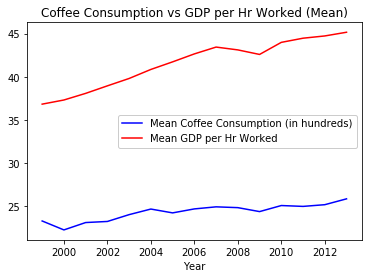

In [16]:
# plotting the lines,
# We show consumption in hundreds, in order to scale with the gdphrwkd,

x_axis = coffee_df["Year"]
coffee_y = coffee_df["Coffee Consumed"]/100
gdp_y = coffee_df["gdp_per_hour_worked"]

coffee_plt, = plt.plot(x_axis, coffee_y, color='blue', label="Mean Coffee Consumption (in hundreds)")
gdp_plt, = plt.plot(x_axis, gdp_y, color='red', label="Mean GDP per Hr Worked")
plt.title("Coffee Consumption vs GDP per Hr Worked (Mean)")
plt.xlabel("Year")
 
plt.legend(loc="right", framealpha=1)
plt.show()


## 6-1. Correlation Between Coffee Consumption and Productivity: Is P-Value < 0.05 and Can We Reject Null-Hypothesis(H0)? (Hypothesis Test)
    P-Value grap
Andrew

In [39]:
df = coffee_data[["Country Name","Year","Coffee Consumed","gdp_per_hour_worked"]]
df.head()

,Country Name,Year,Coffee Consumed,gdp_per_hour_worked
0,Austria,1999,1123,43.67
1,Austria,2000,875,44.71
2,Austria,2001,1013,45.28
3,Austria,2002,926,46.14
4,Austria,2003,720,46.51


In [45]:
x_axis = df['Coffee Consumed']
y_axis = df['gdp_per_hour_worked']

In [46]:
# Correlation
x_axis.corr(y_axis)

0.22849924393502852

In [52]:
# T-Test
from scipy.stats import ttest_ind
(t, p) = ttest_ind(x_axis, y_axis)
if p < 0.005:
    print("There is a strong correlation here")
    print("P-value = " + str(p))
    

There is a strong correlation here
P-value = 1.4250772313999466e-32


In [54]:
from scipy.stats import linregress

(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

<Figure size 4000x1600 with 0 Axes>

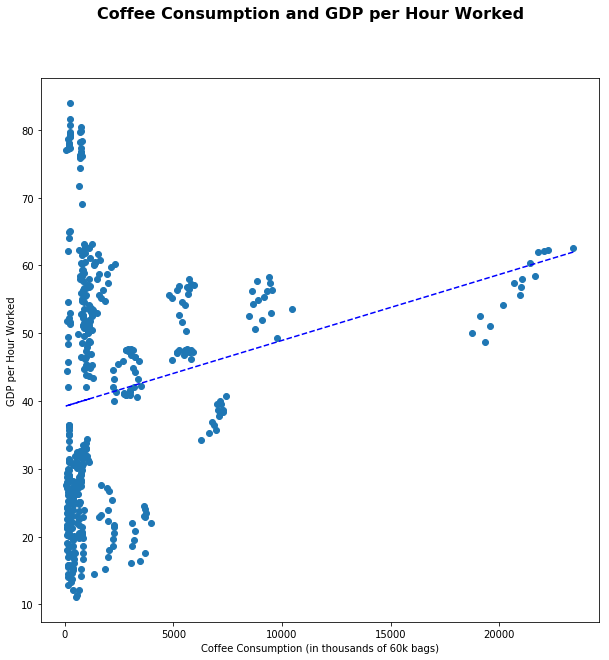

In [69]:
# Plot data
plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure(figsize=(50, 20), dpi= 80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()

fig.suptitle("Coffee Consumption and GDP per Hour Worked", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 10)
#ax.set_ylim(0, 10)


ax.set_xlabel("Coffee Consumption (in thousands of 60k bags)")
ax.set_ylabel("GDP per Hour Worked")

ax.plot(x_axis, y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')


plt.show()

## 6-2. Correlation Between the Changes in the Coffee Consumption and the Changes in Productivity: Is P-Value < 0.05 and Can We Reject Null-Hypothesis(H0)? (Hypothesis Test)

Different from 6-1. 
This is for the "rate of change" in 5-2
Andrew

In [ ]:
# DATA Source
http://www.ico.org/new_historical.asp
https://knoema.com/search?query=coffee&source=HomePage
https://www.worldatlas.com/articles/top-10-coffee-consuming-nations.html
https://fusiontables.google.com/DataSource?docid=1C-fn6nSe21acP0xJIO1T1x0wohqfMYCQyJjbqdk#rows:id=1
https://data.oecd.org/lprdty/gdp-per-hour-worked.htm
https://www.oecd-ilibrary.org/employment/data/oecd-productivity-statistics/gdp-per-capita-and-productivity-growth_data-00685-en